In [2]:
import pandas as pd 
import pandas as pd
from collections import Counter
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

```Load the Dataset```

In [3]:
df_train = pd.read_csv('OfficialTrainingSet1.csv')
df_test = pd.read_csv('OfficialTestSet1.csv')

In [4]:
df_train.iloc[:, 3:] = df_train.iloc[:, 3:].apply(
    lambda x: x.apply(
        lambda item: [i.strip() for i in item.replace('[', '').replace(']', '').replace("'", "").split(',')] 
        if isinstance(item, str) else item
    )
)

In [5]:
df_train.head(5)

,article_code,title,abstract,chemicals,diseases,chemical_start_indices,chemical_end_indices,disease_start_indices,disease_end_indices,chemical_ids,disease_ids,CID_chemical,CID_disease
0,227508,Naloxone reverses the antihypertensive effect ...,"In unanesthetized, spontaneously hypertensive ...","[Naloxone, clonidine, clonidine, nalozone, alp...","[hypertensive, hypotensive, hypertensive, hype...","[0, 49, 181, 244, 306, 354, 364, 487, 563, 589...","[8, 58, 190, 252, 322, 362, 372, 496, 576, 597...","[93, 274, 469, 750]","[105, 285, 481, 762]","[D009270, D003000, D003000, -1, D008750, D0092...","[D006973, D007022, D006973, D006973]",[D008750],[D007022]
1,354896,Lidocaine-induced cardiac asystole.,Intravenous administration of a single 50-mg b...,"[Lidocaine, lidocaine, lidocaine]","[cardiac asystole, depression, bradyarrhythmias]","[0, 90, 409]","[9, 99, 418]","[18, 142, 331]","[34, 152, 347]","[D008012, D008012, D008012]","[D006323, D003866, D001919]",[D008012],[D006323]
2,435349,Suxamethonium infusion rate and observed fasci...,Suxamethonium chloride (Sch) was administered ...,"[Suxamethonium, Suxamethonium chloride, Sch, Sch]","[fasciculations, tetanic, Fasciculations, fasc...","[0, 80, 104, 312]","[13, 102, 107, 315]","[41, 265, 395, 483, 523, 538, 561, 627, 673, 746]","[55, 272, 409, 496, 536, 544, 568, 641, 686, 759]","[D013390, D013390, D013390, D013390]","[D005207, D013746, D005207, D005207, D005207, ...",[D013390],[D005207]
3,603022,"Galanthamine hydrobromide, a longer acting ant...","Galanthamine hydrobromide, an anticholinestera...","[Galanthamine hydrobromide, scopolamine, Hyosc...",[overdosage],"[0, 111, 124, 135, 292, 305, 352, 500]","[25, 122, 132, 160, 303, 313, 365, 511]",[315],[325],"[D005702, D012601, D012601, D005702, D012601, ...",[D062787],[D012601],[D062787]
4,1378968,Effects of uninephrectomy and high protein fee...,Rats with lithium-induced nephropathy were sub...,"[lithium, lithium, lithium, lithium, lithium, ...","[chronic renal failure, nephropathy, renal fai...","[54, 111, 362, 520, 581, 608, 632, 820, 853, 9...","[61, 118, 369, 527, 588, 615, 639, 827, 860, 9...","[70, 127, 309, 975, 1000, 1027, 1087, 1390, 14...","[91, 138, 322, 986, 1012, 1045, 1100, 1401, 14...","[D008094, D008094, D008094, D008094, D008094, ...","[D007676, D007674, D051437, D011507, D006973, ...","[D008094, D008094, D008094]","[D006973, D011507, D007676]"


```Abstract Length Analysis```

In [6]:

df_train['abstract_length'] = df_train['abstract'].apply(len)

max_length = df_train['abstract_length'].max()
min_length = df_train['abstract_length'].min()
avg_length = df_train['abstract_length'].mean()

print(f"Maximum length in characters: {max_length}")
print(f"Minimum length in characters: {min_length}")
print(f"Average length in characters: {avg_length:.2f}")


Maximum length in characters: 3460
Minimum length in characters: 249
Average length in characters: 1207.45


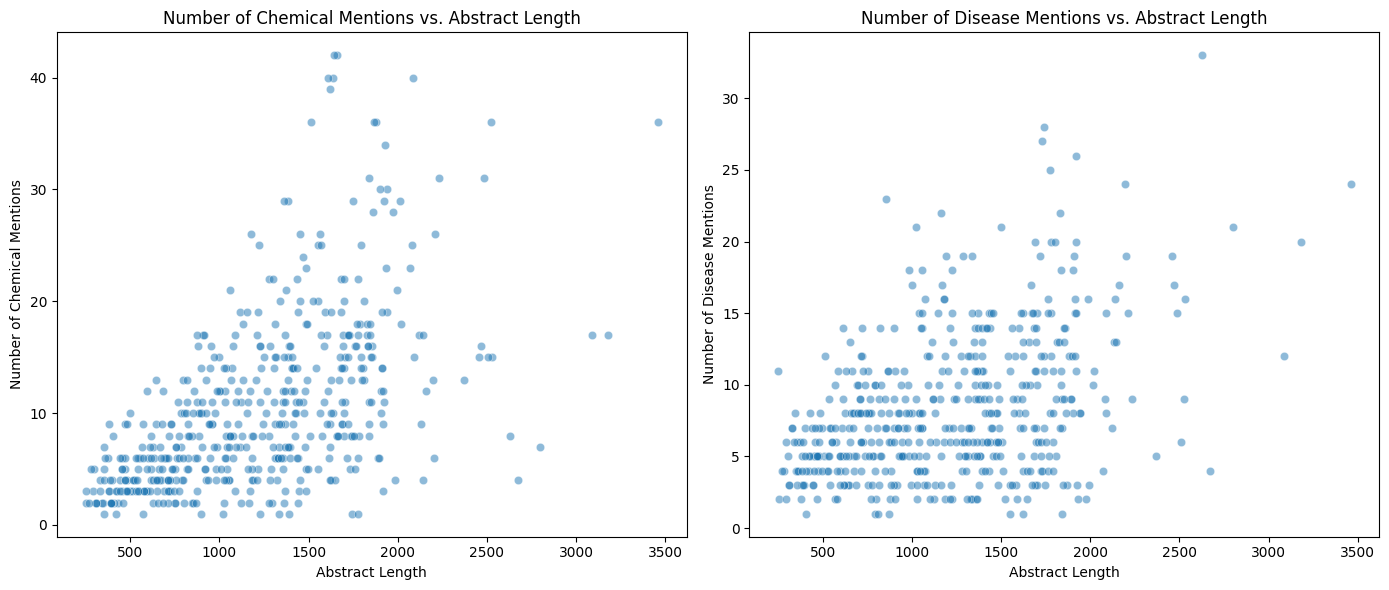

In [7]:
df_train['abstract_length'] = df_train['abstract'].apply(len)

df_train['num_chemicals'] = df_train['chemicals'].apply(len)
df_train['num_diseases'] = df_train['diseases'].apply(len)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='abstract_length', y='num_chemicals', data=df_train, alpha=0.5)
plt.title('Number of Chemical Mentions vs. Abstract Length')
plt.xlabel('Abstract Length')
plt.ylabel('Number of Chemical Mentions')

plt.subplot(1, 2, 2)
sns.scatterplot(x='abstract_length', y='num_diseases', data=df_train, alpha=0.5)
plt.title('Number of Disease Mentions vs. Abstract Length')
plt.xlabel('Abstract Length')
plt.ylabel('Number of Disease Mentions')

plt.tight_layout()
plt.show()


```Count of Chemicals and Diseases Mentioned```

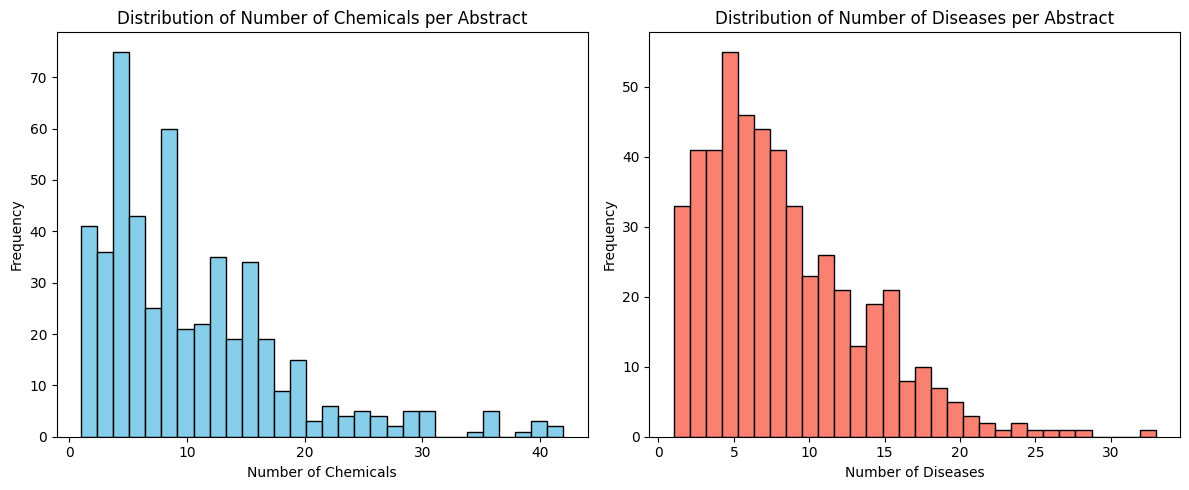

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_train['num_chemicals'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Chemicals per Abstract')
plt.xlabel('Number of Chemicals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_train['num_diseases'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Diseases per Abstract')
plt.xlabel('Number of Diseases')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [10]:
all_chemicals = df_train['chemicals'][0]
all_chemicals

['Naloxone',
 'clonidine',
 'clonidine',
 'nalozone',
 'alpha-methyldopa',
 'naloxone',
 'Naloxone',
 'clonidine',
 '3H-naloxone',
 'naloxone',
 'clonidine',
 '3H-dihydroergocryptine',
 'naloxone',
 'clonidine',
 'clonidine',
 'alpha-methyldopa']

In [11]:
all_chemicals = [chemical for sublist in df_train['chemicals'] for chemical in sublist]
chemical_counts = Counter(all_chemicals)
all_diseases = [disease for sublist in df_train['diseases'] for disease in sublist]
disease_counts = Counter(all_diseases)

In [12]:
print("Chemical counts (most to least frequent):")
for chemical, count in chemical_counts.most_common():  
    print(f"{chemical}: {count}")

Chemical counts (most to least frequent):
cocaine: 99
dopamine: 61
morphine: 52
nicotine: 52
lithium: 45
haloperidol: 44
clonidine: 36
creatinine: 36
cisplatin: 35
lidocaine: 34
calcium: 31
tacrolimus: 31
amphetamine: 30
adriamycin: 28
sirolimus: 28
isoproterenol: 28
Na: 27
cyclophosphamide: 26
carbamazepine: 25
NO: 25
cimetidine: 24
clozapine: 23
caffeine: 23
lamivudine: 23
FK506: 23
bupivacaine: 23
glutamate: 23
warfarin: 23
methamphetamine: 23
scopolamine: 22
acetaminophen: 22
NMDA: 22
pilocarpine: 21
paclitaxel: 20
SRL: 20
verapamil: 20
cholesterol: 20
DOX: 20
Warfarin: 19
PG-9: 19
nitroglycerin: 18
apomorphine: 18
levodopa: 18
TAM: 18
sodium: 17
amiodarone: 17
heparin: 17
alcohol: 17
acetylcholine: 16
dipyridamole: 16
cyclosporine: 16
doxorubicin: 16
angiotensin: 15
epinephrine: 15
gentamicin: 15
dexamethasone: 15
testosterone: 15
ribavirin: 15
propofol: 15
enalapril: 15
sevoflurane: 15
antidepressant: 14
diazepam: 14
aspirin: 14
estrogen: 14
capsaicin: 14
ecstasy: 14
5-FU: 14
VPA

In [13]:
print("Disease counts (most to least frequent):")
for disease, count in disease_counts.most_common():  
    print(f"{disease}: {count}")

Disease counts (most to least frequent):
toxicity: 76
pain: 76
proteinuria: 60
hypotension: 60
seizures: 59
hypertension: 54
seizure: 39
myocardial infarction: 31
hepatitis: 29
nausea: 26
migraine: 25
bradycardia: 25
neurotoxicity: 25
death: 25
encephalopathy: 25
heart failure: 24
hyperactivity: 22
ESRD: 22
anemia: 22
thrombosis: 21
nephropathy: 20
"Parkinsons disease": 20
hearing loss: 19
hepatotoxicity: 19
hyperalgesia: 18
PD: 18
renal failure: 17
headache: 17
hypertensive: 16
tachycardia: 16
tumor: 16
nephrotoxicity: 16
tremor: 16
hypotensive: 15
depression: 15
thrombocytopenia: 15
cardiotoxicity: 14
artery calcification: 14
overdose: 14
akathisia: 14
thrombotic microangiopathy: 14
acute renal failure: 13
ventricular tachycardia: 13
rigidity: 12
HIT: 12
ALF: 12
stroke: 12
vomiting: 12
VTE: 12
fibrosis: 12
dyskinesia: 12
dyskinesias: 11
status epilepticus: 11
cholestasis: 11
atherosclerosis: 11
confusion: 11
convulsions: 11
catalepsy: 11
epileptic: 11
Pain: 11
necrosis: 10
hemolysis:

/var/folders/gj/_qr5ml914f34f1nyb7twnyj40000gn/T/ipykernel_58842/1471751852.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Chemical', data=chemicals_df, palette='viridis', ax=axes[0])
/var/folders/gj/_qr5ml914f34f1nyb7twnyj40000gn/T/ipykernel_58842/1471751852.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Disease', data=diseases_df, palette='magma', ax=axes[1])


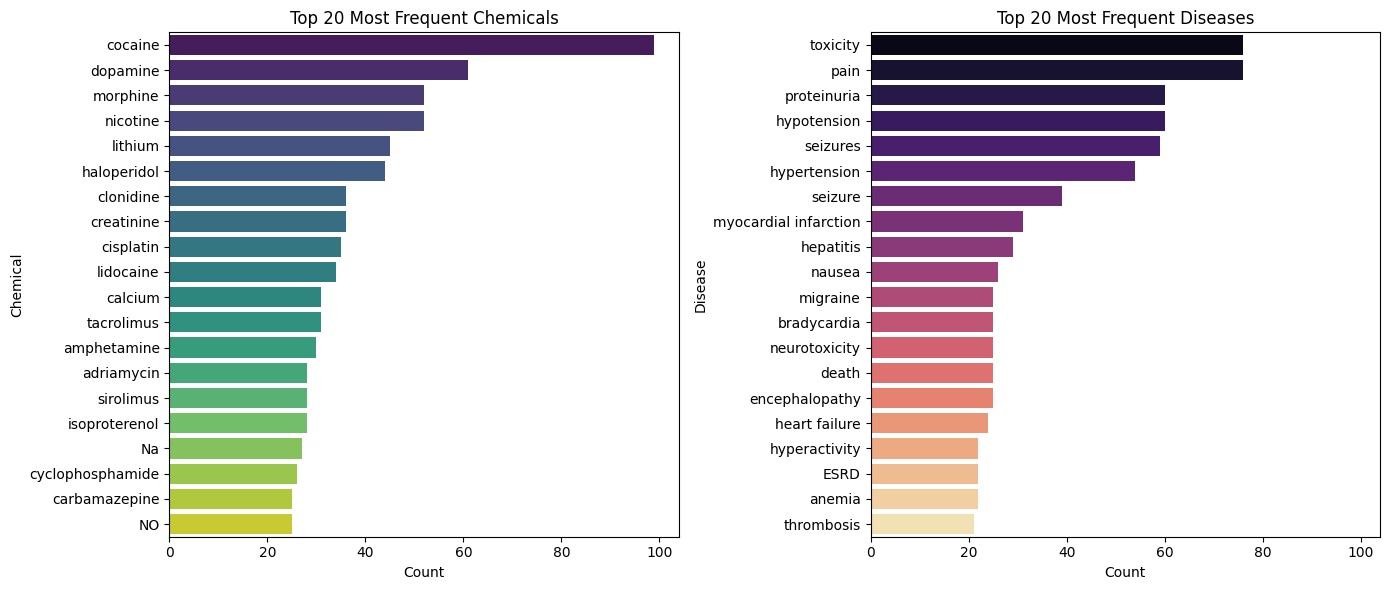

In [14]:
top_20_chemicals = chemical_counts.most_common(20)
top_20_diseases = disease_counts.most_common(20)

chemicals_df = pd.DataFrame(top_20_chemicals, columns=['Chemical', 'Count'])
diseases_df = pd.DataFrame(top_20_diseases, columns=['Disease', 'Count'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

sns.barplot(x='Count', y='Chemical', data=chemicals_df, palette='viridis', ax=axes[0])
axes[0].set_title('Top 20 Most Frequent Chemicals')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Chemical')

sns.barplot(x='Count', y='Disease', data=diseases_df, palette='magma', ax=axes[1])
axes[1].set_title('Top 20 Most Frequent Diseases')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Disease')

plt.tight_layout()
plt.show()


```Chemical-Disease Relationship (CID) Analysis```

In [15]:
all_CID_chemical= df_train['CID_chemical'][4]
all_CID_disease= df_train['CID_disease'][4]

print(all_CID_chemical)
print(all_CID_disease)

['D008094', 'D008094', 'D008094']
['D006973', 'D011507', 'D007676']


In [16]:
relationships = []
for chemicals, diseases in zip(df_train['CID_chemical'], df_train['CID_disease']):
    relationships.extend(list(zip(chemicals, diseases)))

relationship_counts = Counter(relationships)

most_common_relationships = relationship_counts.most_common(20) 

relationship_df = pd.DataFrame(most_common_relationships, columns=['Relationship', 'Count'])
relationship_df[['Chemical', 'Disease']] = pd.DataFrame(relationship_df['Relationship'].tolist(), index=relationship_df.index)
relationship_df.drop('Relationship', axis=1, inplace=True)

print(relationship_df)


    Count Chemical  Disease
0       6  D006220  D002375
1       5  D009599  D007022
2       5  D011692  D011507
3       5  D010862  D013226
4       5  D020123  D011507
5       5  D003042  D012640
6       5  D007545  D009203
7       5  D007980  D004409
8       4  D002211  D006930
9       4  D006220  D001480
10      4  D012601  D000647
11      4  D014635  D001927
12      4  D000661  D006948
13      4  D004317  D009202
14      4  D006514  D006509
15      3  D005996  D007022
16      3  D005283  D007022
17      3  D003520  D003556
18      3  D003907  D006973
19      3  D003000  D001919


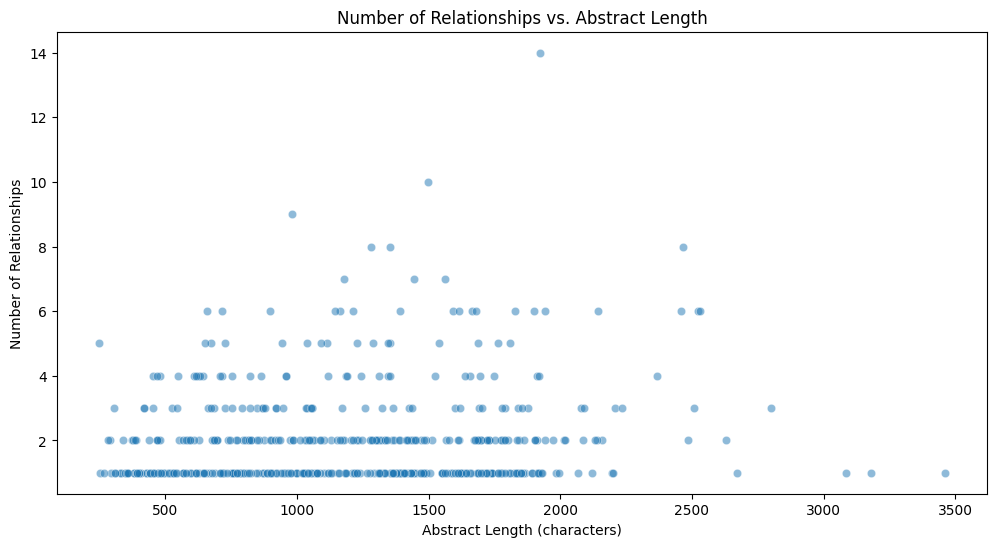

In [17]:
df_train['abstract_length'] = df_train['abstract'].apply(len)

def count_relationships(cids_chemicals, cids_diseases):
    return len(list(zip(cids_chemicals, cids_diseases)))

df_train['num_relationships'] = df_train.apply(lambda row: count_relationships(row['CID_chemical'], row['CID_disease']), axis=1)

plt.figure(figsize=(12, 6))

sns.scatterplot(x='abstract_length', y='num_relationships', data=df_train, alpha=0.5)
plt.title('Number of Relationships vs. Abstract Length')
plt.xlabel('Abstract Length (characters)')
plt.ylabel('Number of Relationships')
plt.show()
